# Regresión Logística (LR o LoR)

Este tipo de regresión se centra en la gráfica sigmoide (en forma de S) que representa la probabilidad entre 0 y 1 de que ocurra algo; se divide en dos clases, positiva (cuando es >= 0.5) o negativa (cuando es < 0.5)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

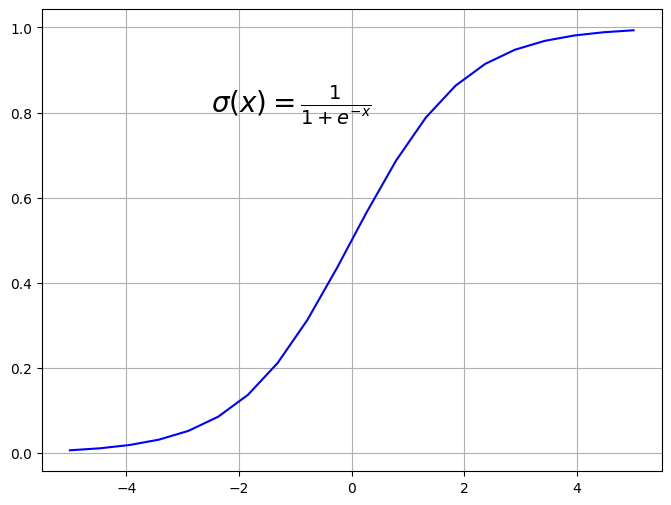

In [3]:
"""
ESTO SOLO SIRVE A NIVEL TEÓRICO NO TIENE APLICABILIDAD EN LA PRÁCTICA,
AQUÍ SE MUESTRA CÓMO SE VE LA GRÁFICA DE LA PROBABILIDAD ENTRE 0 Y 1 
Y CÓMO SE SUPONE QUE SE DIBUJA ESA LÍNEA EN S QUE REPRESENTA A LA
REGRESIÓN LOGÍSTICA
"""

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
x = np.linspace(-5, 5, 20)
plt.grid()
ax.text(-2.5, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=20)
plt.plot(x, sigmoid(x), 'b')

In [27]:
"""
En la practica se usará más 
frecuentemente las siguientes 
importaciones
"""
# Preprocesamiento
from sklearn.preprocessing import LabelEncoder          # Su transformación tiene un peso sobre la predicción del modelo (son valores enteros que pueden ser comparados por orden, ejemplo: 0, 1, 2)
from sklearn.preprocessing import OneHotEncoder         # Su transformación solo sirve para separar categorías o para usarse como etiquetas, no tiene un peso por sí solo
from sklearn.preprocessing import StandardScaler        # Hace que los valores estén bajo la misma escala para que el modelo las compare todas por igual

# Importaciones de entrenamiento para Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Ejemplo de entrenamiento común

In [ ]:
# Dadaset de x = horas de estudio, vs y = aprobado o reprobado
x = np.array([[1], [2], [3], [4], [5], [6]])    # Características
y = np.array([0, 0, 0, 1, 1, 1])                # Etiquetas

In [ ]:
# Variables de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [7]:
# Se crea el modelo predictivo
model = LogisticRegression()
# Se entrena con los datos
model.fit(x_train, y_train)
# Se hace la predicción
y_pred = model.predict(x_test)

In [ ]:
print(f"Predicción: {y_pred}\n\nPrecisión: {accuracy_score(y_test, y_pred)}\n\nProbabilidad:\n{model.predict_proba(x_test)}")

Predicciones: [0 1]

Precisión: 0.5

Probabilidad:
[[0.58781698 0.41218302]
 [0.18626407 0.81373593]]


## Ejemplo con preprocesamiento y normalización

In [18]:
# Dataset de animales
data = pd.DataFrame({
    "animal": ["perro", "gato", "pez", "loro", "tigre", "perro", "gato", "pez"],    # Categorías
    "es_domestico": ["si", "si", "no", "si", "no", "si", "si", "no"]                # Etiquetas
})

x = data[['animal']].values        # Debe ser de 2 dimensiones el array
y = data['es_domestico'].values    # Debe ser de 1D

data    # Datos sin procesar

,animal,es_domestico
0,perro,si
1,gato,si
2,pez,no
3,loro,si
4,tigre,no
5,perro,si
6,gato,si
7,pez,no


In [ ]:
# Transformación a un vector binario
ohn = OneHotEncoder(sparse_output=False)
x_encoded = ohn.fit_transform(x)

print(f"OneHotEncoder de x:\n{x_encoded}\n\nCategorías:\n{ohn.categories_}")

OneHotEncoder de x:
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]

Categorías:
[array(['gato', 'loro', 'perro', 'pez', 'tigre'], dtype=object)]


In [ ]:
# Escalado estándar
sc = StandardScaler()
x_scaled = sc.fit_transform(x_encoded)
x_scaled

array([[-0.57735027, -0.37796447,  1.73205081, -0.57735027, -0.37796447],
       [ 1.73205081, -0.37796447, -0.57735027, -0.57735027, -0.37796447],
       [-0.57735027, -0.37796447, -0.57735027,  1.73205081, -0.37796447],
       [-0.57735027,  2.64575131, -0.57735027, -0.57735027, -0.37796447],
       [-0.57735027, -0.37796447, -0.57735027, -0.57735027,  2.64575131],
       [-0.57735027, -0.37796447,  1.73205081, -0.57735027, -0.37796447],
       [ 1.73205081, -0.37796447, -0.57735027, -0.57735027, -0.37796447],
       [-0.57735027, -0.37796447, -0.57735027,  1.73205081, -0.37796447]])

In [20]:
# Transformación a enteros
le = LabelEncoder()
y_encoded = le.fit_transform(y) #type:ignore

print(f"LabelEncoder de y:\n{y_encoded}\n\nClases(Etiquetas):\n{le.classes_}")


LabelEncoder de y:
[1 1 0 1 0 1 1 0]

Clases(Etiquetas):
['no' 'si']


In [29]:
# Entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.25, random_state=7)
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [30]:
print(f"Predicción: {y_pred}\n\nPrecisión: {accuracy_score(y_test, y_pred)}\n\nProbabilidad:\n{model.predict_proba(x_test)}")

Predicción: [0 1]

Precisión: 1.0

Probabilidad:
[[0.69815722 0.30184278]
 [0.16263249 0.83736751]]
